In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load cleaned data
train_df = pd.read_csv("titanic dataset for fare/cleaned_train.csv")
test_df = pd.read_csv("titanic dataset for fare/cleaned_test.csv")

In [48]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,False,True


In [49]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,False,True
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,True,False
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,False,True


In [50]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
target = 'Fare'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [52]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Sklearn fare prediction (Linear Regression) :")
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))
print("R² Score:", round(r2, 4))

Sklearn fare prediction (Linear Regression) :
MSE: 1891.2486
RMSE: 43.4885
R² Score: 0.3923


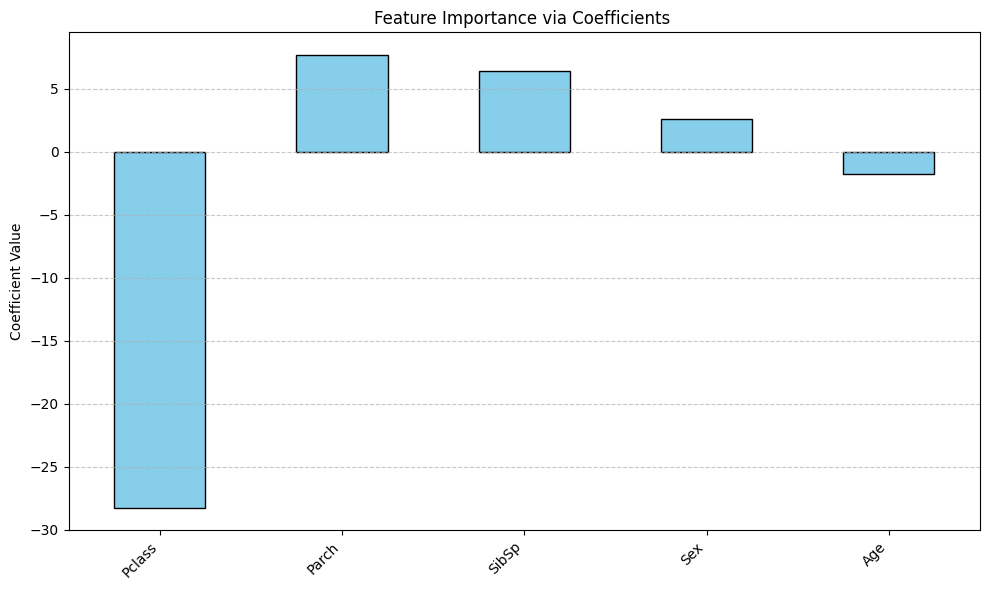

In [53]:
# Feature Importance (coefficients)
coef_series = pd.Series(model.coef_, index=features).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
coef_series.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance via Coefficients ")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [54]:
# Feature Engineering
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['Sex_Pclass'] = df['Sex'] * df['Pclass']

# Updating features with newly added ones
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Sex_Pclass']
target = 'Fare'

In [55]:
X_train = train_df[features]
y_train = np.log1p(train_df[target])  # log(Fare)

X_test = test_df[features]
y_test_raw = test_df[target]  # keeping original for inverse evaluation

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Train model
model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train)

# Predict in log space → convert back
y_pred_log = model_log.predict(X_test_scaled)
y_pred_actual = np.expm1(y_pred_log)


In [60]:
# Evaluate on real scale
mse_log = mean_squared_error(y_test_raw, y_pred_actual)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test_raw, y_pred_actual)

print("\nSklearn Linear Regression (With log and feature engineering):")
print("MSE:", round(mse_log, 4))
print("RMSE:", round(rmse_log, 4))
print("R² Score:", round(r2_log, 4))



Sklearn Linear Regression (With log and feature engineering):
MSE: 1826.9896
RMSE: 42.7433
R² Score: 0.4129


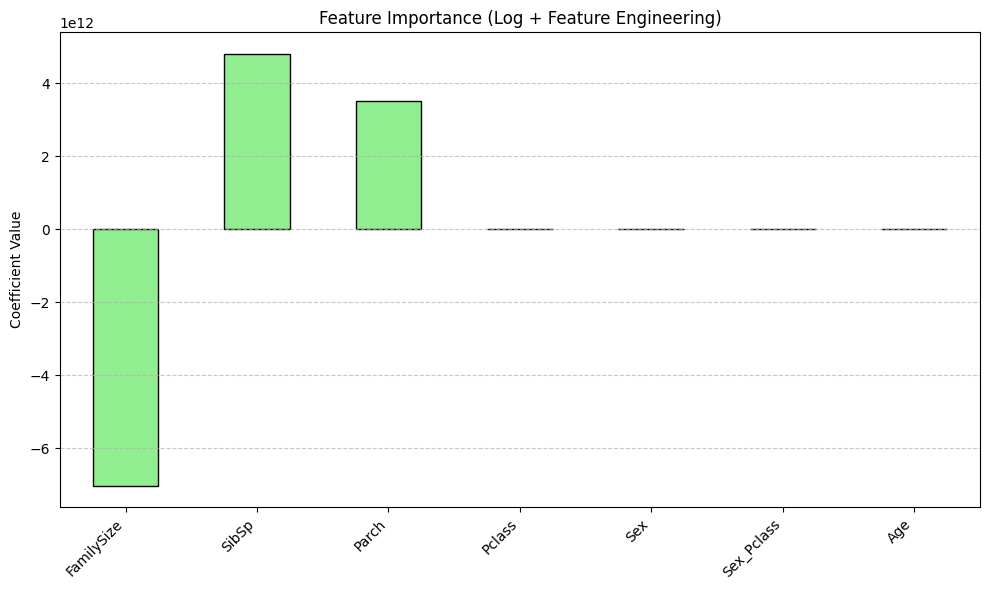

In [61]:
# Feature Importance
coef_series_log = pd.Series(model_log.coef_, index=features).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
coef_series_log.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Feature Importance (Log + Feature Engineering)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



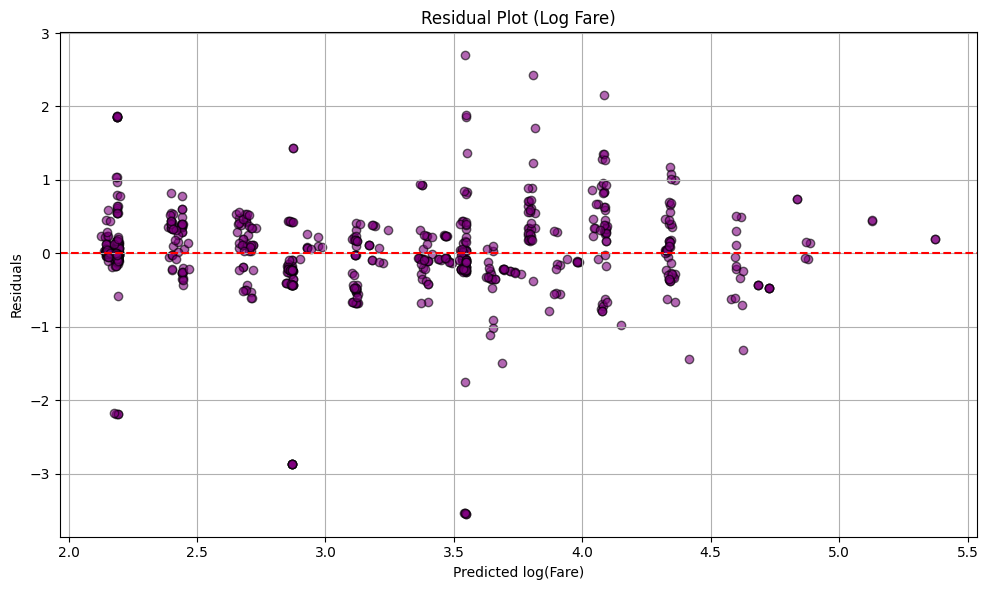

In [59]:
# Residual Plot
residuals_log = y_train - model_log.predict(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(model_log.predict(X_train_scaled), residuals_log, color='purple', edgecolor='black', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted log(Fare)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Log Fare)")
plt.grid(True)
plt.tight_layout()
plt.show()
